# Looping numnber of opponents Notebook
## Author: Robert 
## Date: December 3, 2020 

The purpose of this notebook is to examine how player win percentage changes depending on how many opponents they are facing

In [1]:
## library imports

import csv ## for results writing

from dice import ScoreBasedPlayer, Game ## Dice game objects
from collections import defaultdict ## for storing results
from simulations import score_based_simulations ## for running simulations

In [2]:
## simulation parameters

num_games = 10000 ## number of simulations
num_players = range(2,20) ## range of the number of players
player_scores = range(50,1000,50) ## scores to be examined
max_player_scores = 750 ## highest score the opponents will try and roll till 

In [3]:
## dictionary for holding results

players = defaultdict(float)

In [4]:
## looping through the number of opponents, checking how different players fare against different number of opponents 

for num_player in num_players:
    players[num_player] = score_based_simulations([player_score for player_score in player_scores],num_games=num_games,num_players=num_player,max_player_scores=max_player_scores)

In [5]:
## writing results to a CSV file 

with open('scoredbasedloopednumberofplayers.csv',mode='w',newline='') as file:
    wr = csv.writer(file,delimiter=',')
    wr.writerow(['NumberOfPlayers','Score','WinPercentage','AverageOpponentScore'])
    for num_player in num_players:
        for key,value in players[num_player].items():
            wr.writerow([num_player,key,value[0],value[1]])

In [6]:
## libraries for checking results

import pandas as pd
import matplotlib.pyplot as plt

In [7]:
## reading in results 

df = pd.read_csv(r'scoredbasedloopednumberofplayers.csv')
df

,NumberOfPlayers,Score,WinPercentage,AverageOpponentScore
0,2,50,0.1528,373.700000
1,2,100,0.2983,375.175000
2,2,150,0.4681,375.550000
3,2,200,0.5658,374.570000
4,2,250,0.6085,377.875000
...,...,...,...,...
337,19,750,0.0524,374.903333
338,19,800,0.0404,375.299444
339,19,850,0.0378,376.117222
340,19,900,0.0388,374.813333


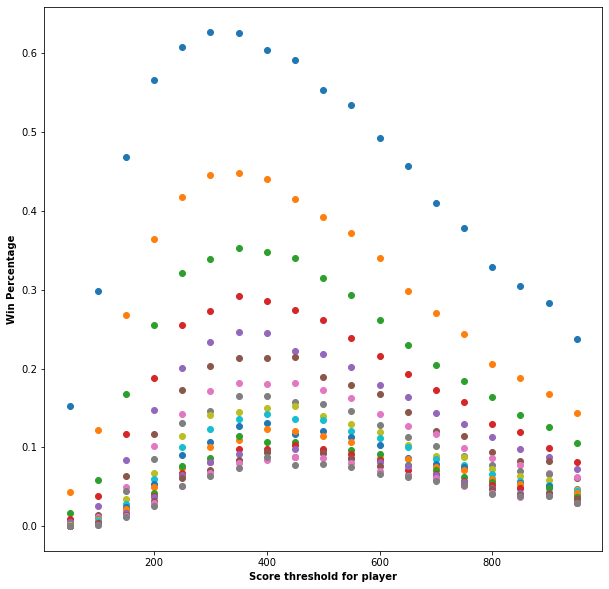

In [8]:
## plotting results 

fig,ax = plt.subplots(1,figsize=(10,10))
for player in df.NumberOfPlayers.unique():
    temp_df = df.loc[df.NumberOfPlayers == player]
    
    ax.scatter(temp_df.Score,temp_df.WinPercentage)
    
ax.set_xlabel("Score threshold for player",fontweight='bold')
ax.set_ylabel('Win Percentage',fontweight='bold')

plt.show()
    